In [1]:
from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import skimage.measure as sk

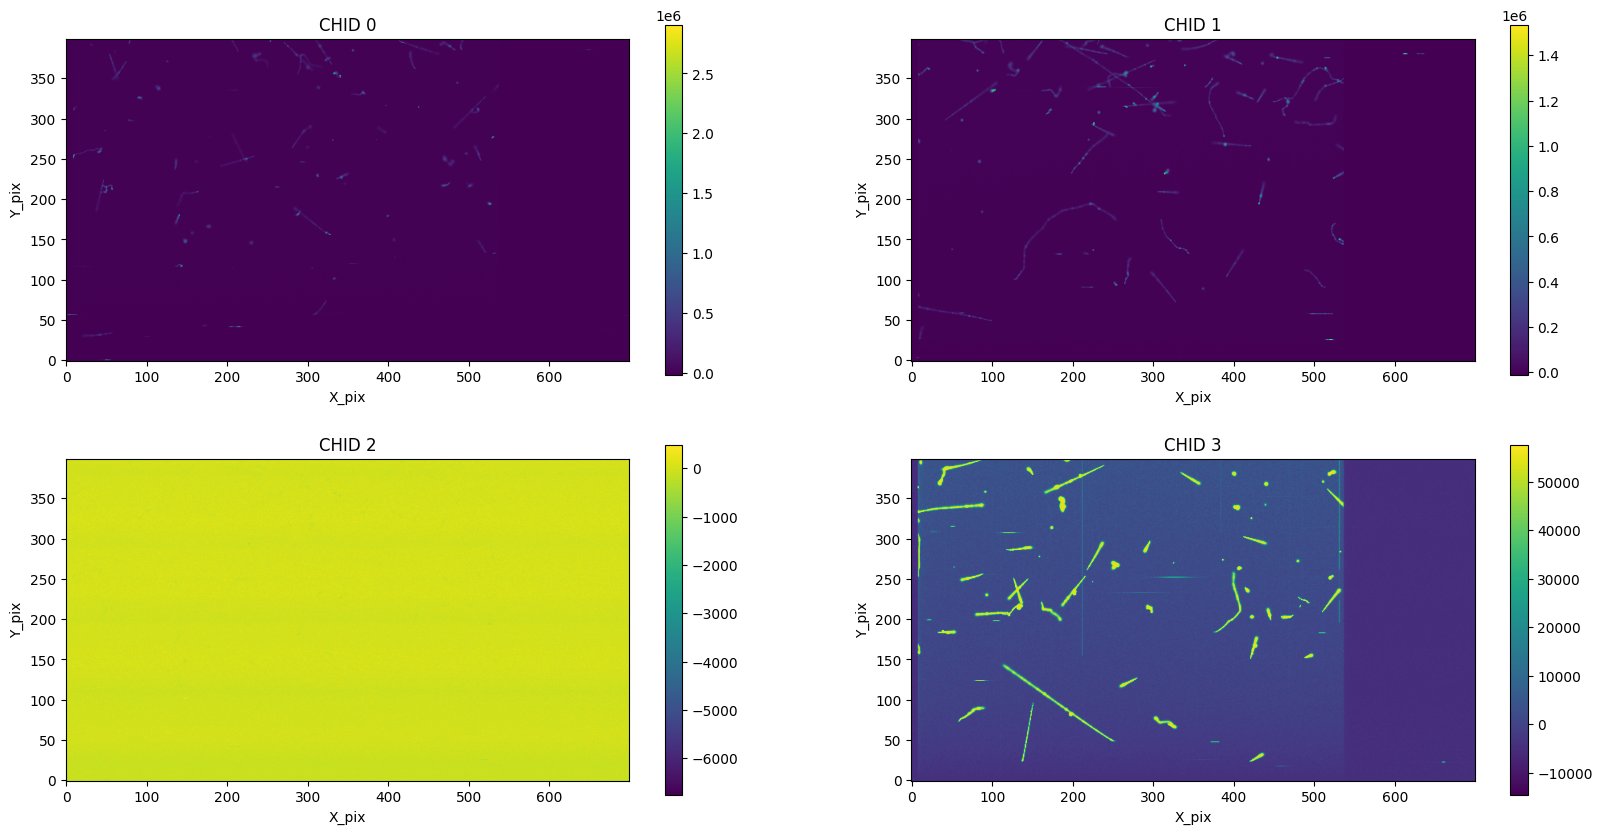

In [2]:
#path="/Users/steph/Desktop/ServicioSocial/Imagenes/proc_skp_m-009_microchip_T_170__NSAMP_1_NROW_650_NCOL_700_EXPOSURE_120_img_241.fits"
#path="/Users/steph/Desktop/ServicioSocial/Imagenes/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_60_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_2.fits"
#path="/Users/steph/Desktop/ServicioSocial/Imagenes/proc_skp_m-009_microchip_T_170__NSAMP_200_NROW_30_NCOL_700_EXPOSURE_0_img_243.fits"
#path="/Users/steph/Desktop/ServicioSocial/Imagenes/proc_skp_m_009_microchip_T_170_Vv82_NSAMP_324_NROW_400_NCOL_700.fits"
path="/home/oem/datosFits/Data_2023/spuriousCharge/Microchip/01NOV23/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_71.fits"
hdu= fits.open(path)

# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu[i].data-np.median(hdu[i].data),origin="lower")#vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
    plt.colorbar()
plt.show()

In [3]:
#data= precal(hdu_list,extensions=4)
hdu[3].data.max()

72209.55

In [4]:
label,num_objects=ndimage.label(hdu[3].data>11000,structure=[[1,1,1],[1,1,1],[1,1,1]])

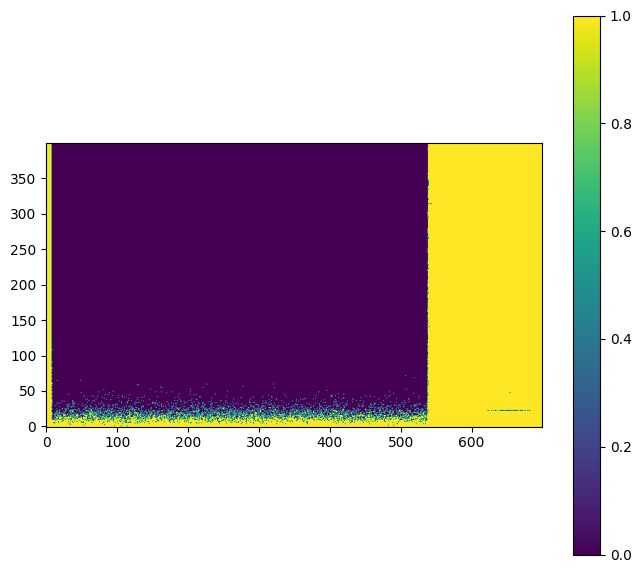

In [5]:
plt.figure(figsize=(8,7))
plt.imshow(label==0, cmap='viridis', vmax=1,vmin=0,origin="lower")
plt.colorbar()
plt.show()


In [6]:
AA=np.s_[:,:550]
OS=np.s_[:,550:]

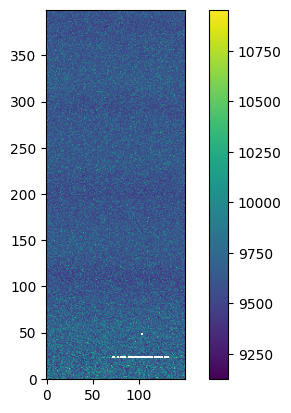

In [7]:
mask_inv=np.invert(label==0)
mx=ma.array(hdu[3].data,mask=mask_inv)
plt.imshow(mx[OS],origin="lower")
#plt.imshow(mx,vmin=0,vmax=1)
plt.colorbar()

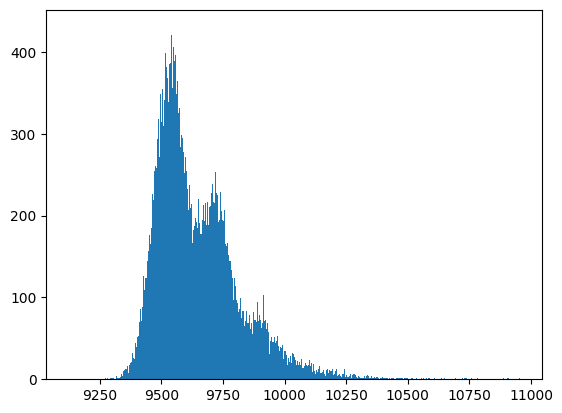

In [8]:
histograma, bins_x,_=plt.hist(mx[OS].flatten(),bins=1000)

In [9]:

bins_x

array([ 9124.034,  9125.864,  9127.693, ..., 10949.989, 10951.818,
       10953.648], dtype=float32)

In [10]:
#histograma, bins_x,_=plt.hist(hdu[3].data.flatten(),bins=1000)

In [11]:
from scipy.optimize import curve_fit
import numpy as np

In [12]:
def gauss(x,x0,s,A): # x=data, x0=mean, s=StdDev, A=amplitud
    return A*np.exp(-(x-x0)**2/(2*s**2))/np.sqrt(np.pi*2*s**2)

In [13]:
def gaussian2(x,m,s,g,a1,a2): #data, mean, sigma, gain, height1, heigth2
    return a1*np.exp(-1/2*((x-m)/s)**2)+a2*np.exp(-1/2*((x-m-g)/s)**2)

In [14]:
def doublegaus(x, norm, offset, noise, gain, mu):
  return (1.0-mu)*norm*np.exp(-((x-offset)**2/(2*(gain*noise)**2))) + mu*norm*np.exp(-((x-offset-gain)**2/(2*(gain*noise)**2)))

9534.338916487406
67.44586809391008
196.98294171200067
374.8786680876511
209.5203897841055


mean=9535.79330896457 
sigma:70.19607530534539 
gain: 202.80761025949286 
 h1: 279.617109046552
 h2: 162.6543906976856



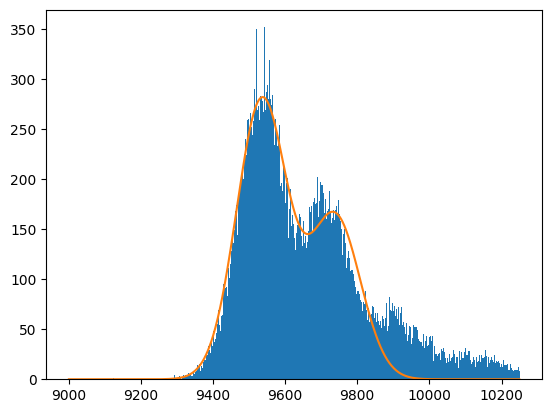

In [72]:
histograma, bins_x,_=plt.hist(hdu[3].data.flatten(),bins=1000,range=(9000,10250))
bins_=(bins_x[1:]+bins_x[:-1])/2
popt,_=curve_fit(gaussian2,bins_,histograma,p0=(9530,65,205,250,125)) #initial parameters 
plt.plot(bins_, gaussian2(bins_, *popt))
print("mean={} \nsigma:{} \ngain: {} \n h1: {}\n h2: {}\n".format(*popt))



 # Resta de la media 

In [ ]:
dataCen=hdu[3].data-media

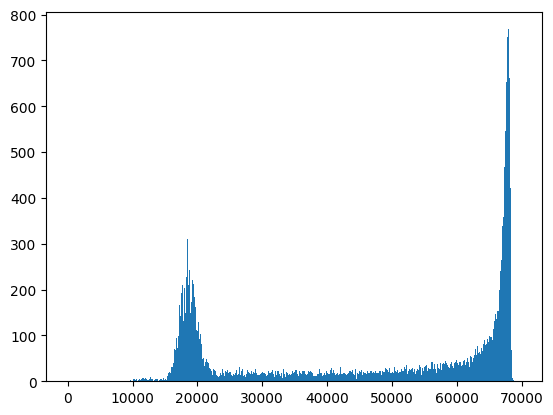

In [ ]:
histogramaCen, bins_xCen,_=plt.hist(dataCen.flatten(),bins=1000, range=(-5000,5000))

In [ ]:
binsCen= (bins_xCen[1:]+bins_xCen[:-1])/2
poptCen,_=curve_fit(gauss, binsCen,histogramaCen)

OptimizeWarning: Covariance of the parameters could not be estimated

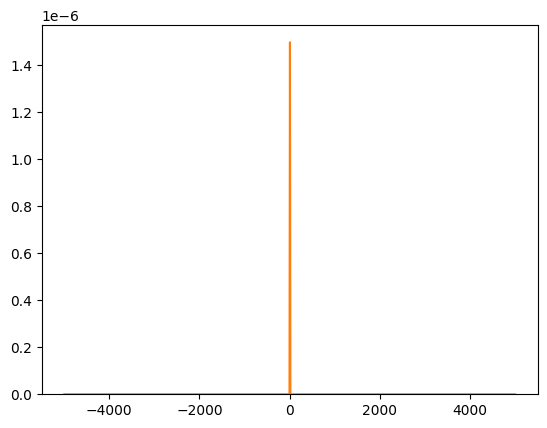

In [ ]:
plt.hist(dataCen.flatten(),bins=1000,range=(-5*sigma,5*sigma))
plt.plot(binsCen, gauss(binsCen, *poptCen))

In [ ]:
poptCen

array([0.63327329, 0.80627093, 7.08521668])

Text(0.5, 1.0, 'Imagen en centrada cero')

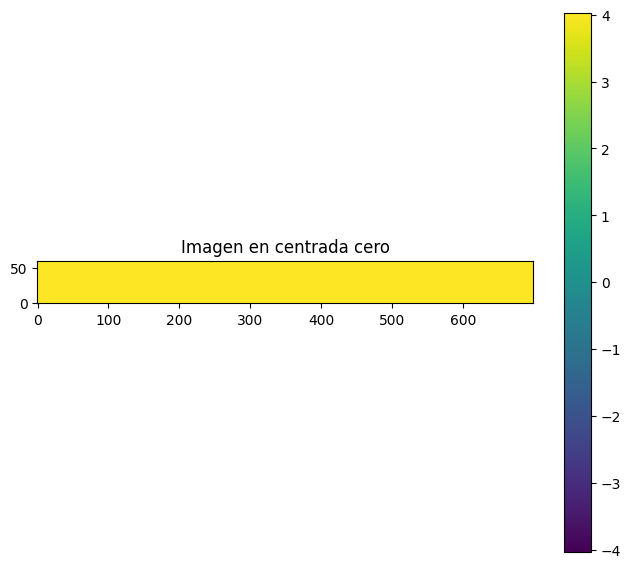

In [ ]:
plt.figure(figsize=(8,7))
plt.imshow(dataCen, cmap='viridis', vmax=5*sigma,vmin=-5*sigma,origin="lower")
plt.colorbar()
plt.title("Imagen en centrada cero")

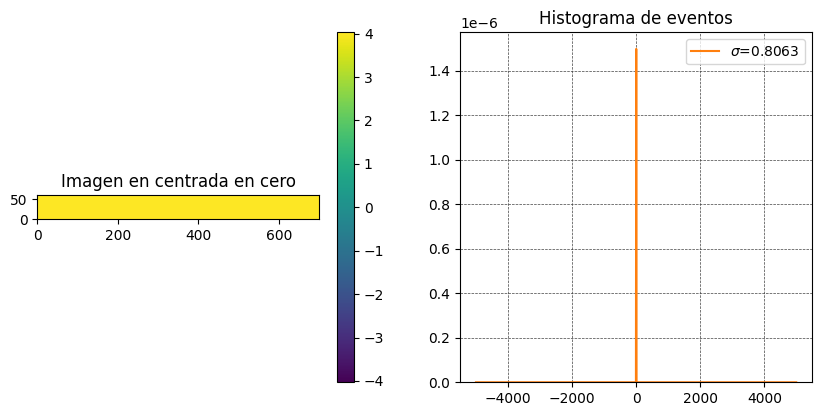

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(dataCen, cmap='viridis', vmax=5*sigma,vmin=-5*sigma,origin="lower")
plt.colorbar()
plt.title("Imagen en centrada en cero")

plt.subplot(2,2,2)
plt.hist(dataCen.flatten(),bins=1000,range=(-5*sigma,5*sigma))
plt.plot(binsCen, gauss(binsCen, *poptCen), label="$\sigma$="+str(poptCen[1].round(4)))
plt.title("Histograma de eventos")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()
plt.show()

numero de colubnas: 60
Numero de renglones: 700
677


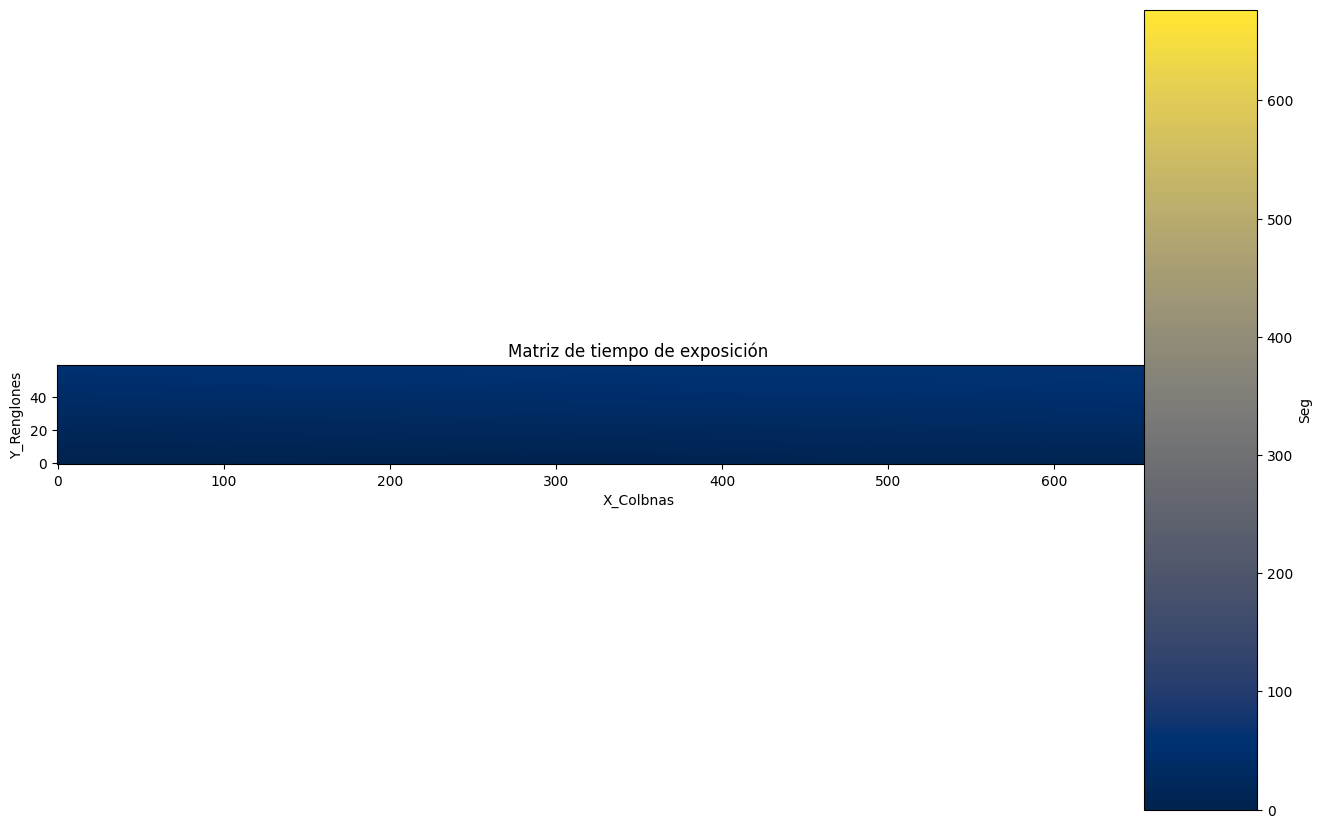

In [ ]:
ExpoMatrix, Ttot, NRow, NCol, NSamp= totTime(path)
fig=plt.figure(figsize=(15,10))
plt.subplot(1,1,1)

cmap = mpl.cm.cividis

#plt.imshow(ExpoMatrix,cmap=cmap,vmin=0,vmax=Ttot/3600) #Horas
plt.imshow(ExpoMatrix,cmap=cmap, vmin=0,vmax=Ttot,origin="lower") #Segundos

plt.title('Matriz de tiempo de exposición')
plt.ylabel('Y_Renglones')
plt.xlabel('X_Colbnas')

cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.ylabel('Seg')


# ExpoMatrix
print("numero de colubnas: "+str(NCol))
print("Numero de renglones: "+str(NRow))
print(Ttot)




In [ ]:
head=hdu[3].header
head

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  700 / length of data axis 1                          
NAXIS2  =                  400 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CCDNCOL = '1058    '           / Smart sequencer variable                       
CCDNPRES= '7       '           / Smart sequencer variable                       
CCDNROW = '1278    '           / Smart sequencer variable                       
HIERARCH CLEARNCOL = '4000    ' / Smart sequencer variable                      
EXPOSURE= '0       '           / Smart sequencer variable                       
NBINCOL = '1       '        

In [ ]:
HEF,VEF=exposureFactor(path)

HEF=0.016119047619052154 VEF=0.9671428571429118


In [ ]:
HEF

array([ 1.61190476e-02, -2.17838236e-12])

HEF=0.016119047619052154 VEF=0.9671428571429118


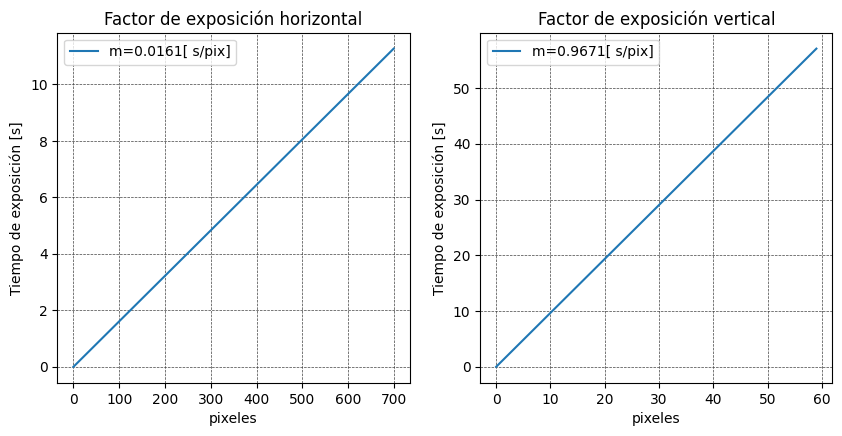

In [ ]:
HEF,VEF=exposureFactor(path)
plt.figure(figsize=(10,10))


plt.subplot(2,2,2)
plt.plot(range(0,len(ExpoMatrix[:,0])), line(range(0,len(ExpoMatrix[:,0])), *VEF), label="m="+str(VEF[0].round(4))+"[ s/pix]")
plt.title("Factor de exposición vertical")
plt.xlabel("pixeles")
plt.ylabel("Tiempo de exposición [s]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()

plt.subplot(2,2,1)
plt.plot(range(0,len(ExpoMatrix[0])), line(range(0,len(ExpoMatrix[0])), *HEF), label="m="+str(HEF[0].round(4))+"[ s/pix]")
plt.title("Factor de exposición horizontal")
plt.xlabel("pixeles")
plt.ylabel("Tiempo de exposición [s]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()
plt.show()

In [ ]:
data_Row, data_Col, Row_bins, Col_bins, Row_hist, Col_hist = hist_RowColumn(dataCen)

media on Row=56247.79, stdDev on y=14851.954
Check
media on Col=53353.926, stdDev on y=19777.377


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


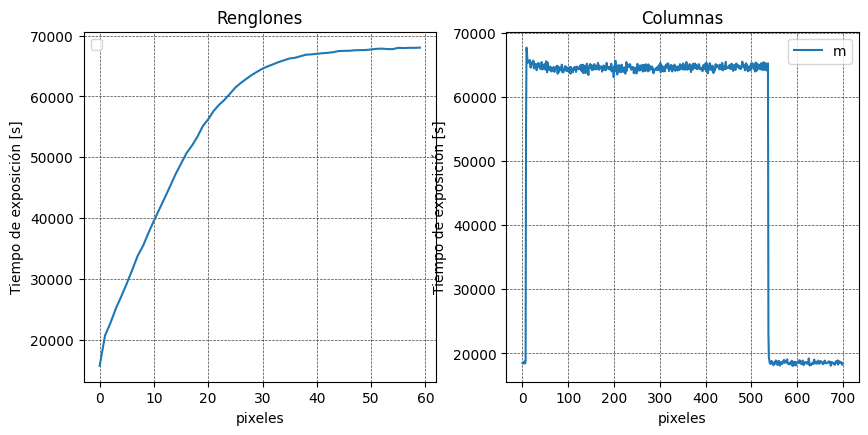

In [ ]:
plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
plt.plot(data_Row)
plt.title("Renglones")
plt.xlabel("pixeles")
plt.ylabel("Tiempo de exposición [s]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()

plt.subplot(2,2,2)
plt.plot(data_Col, label="m")
plt.title("Columnas")
plt.xlabel("pixeles")
plt.ylabel("Tiempo de exposición [s]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()
plt.show()

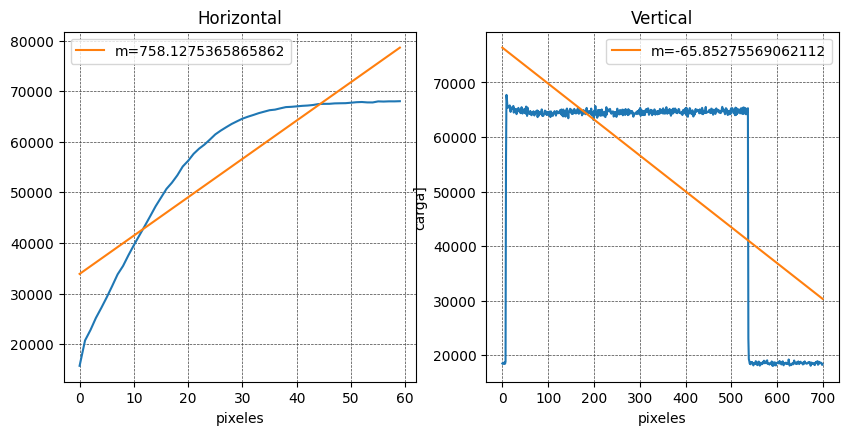

In [ ]:
poptV,_=curve_fit(line, range(0,len(data_Col)),data_Col)
poptH,_=curve_fit(line, range(0,len(data_Row)),data_Row)

plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
plt.plot(data_Row)
plt.plot(line(range(0,len(data_Row)),*poptH),label="m="+str(poptH[0]))
plt.title("Horizontal")
plt.xlabel("pixeles")
#plt.ylabel("Tiempo de exposición [s]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()

plt.subplot(2,2,2)
plt.plot(data_Col)
plt.plot(line(range(0,len(data_Col)),*poptV),label="m="+str(poptV[0]))
plt.title("Vertical")
plt.xlabel("pixeles")
plt.ylabel("carga]")
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
plt.legend()
plt.show()